In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_context("poster")

In [3]:
df_str_info = pd.read_csv(
    "/Users/maxverbiest/PhD/data/str_panels/tral_and_perf_panel_meta_info.tsv",
    sep="\t"
)

# df_patient_variation = pd.read_csv(
#     "/Users/maxverbiest/PhD/projects/genotype_strs/results/oxana_variation/patient_variation_wide_pt_vs_stn.csv",
#     sep=","
# )
df_patient_variation_filt = pd.read_csv(
    "/Users/maxverbiest/PhD/projects/genotype_strs/results/oxana_variation/patient_variation_wide_blood_filt.csv",
    sep=","
)

# df_locus_var = pd.read_csv(
#     "/Users/maxverbiest/PhD/projects/genotype_strs/results/oxana_variation/20220527_locus_variation_MSI_groups.csv"
# )

df_clinical = pd.read_csv(
    "/Users/maxverbiest/PhD/projects/genotype_strs/data/clinical/oxana_tcga_clinical.csv", 
).loc[:, ["case_submitter_id", "gender", "MSI", "CMS"]]
df_clinical.columns = ["patient", "gender", "MSI", "CMS"]

In [5]:
# df_patient_variation.patient.nunique()
df_patient_variation_filt.patient.nunique()

157

In [5]:
from str_analysis_utils import filter_variation_df, get_difference_options

df_patient_variation_filt = filter_variation_df(df_patient_variation, df_str_info, min_period=1).reset_index(drop=True)
df_patient_variation_filt["patient_len_diff"] = df_patient_variation_filt.apply(lambda row: min(get_difference_options(row)), axis=1)

df_patient_variation_filt

,tmp_id,repeat_id,chr,start,end,period,ref,patient,allele_a_healthy,allele_b_healthy,allele_a_tumor,allele_b_tumor,patient_len_diff
0,chr10_100042463,223515.0,chr10,100042463,100042474,4,3,TCGA-A6-2675,3,3,3,3,0
1,chr10_100069930,223540.0,chr10,100069930,100069939,1,10,TCGA-A6-2675,10,10,9,9,2
2,chr10_1000869,166716.0,chr10,1000869,1000876,2,4,TCGA-A6-2675,4,4,4,4,0
3,chr10_100152407,NaN,chr10,100152407,100152414,2,4,TCGA-A6-2675,4,4,4,4,0
4,chr10_100218932,223651.0,chr10,100218932,100218948,1,17,TCGA-A6-2675,17,17,17,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238563,chrX_71616685,861948.0,chrX,71616685,71616705,3,7,TCGA-AA-3534,7,7,7,7,0
238564,chrX_71618406,861943.0,chrX,71618406,71618425,5,4,TCGA-AA-3534,4,4,4,4,0
238565,chrX_74421901,862991.0,chrX,74421901,74421908,2,4,TCGA-AA-3534,4,4,4,4,0
238566,chrX_76173222,863552.0,chrX,76173222,76173238,1,17,TCGA-AA-3534,16,16,17,17,2


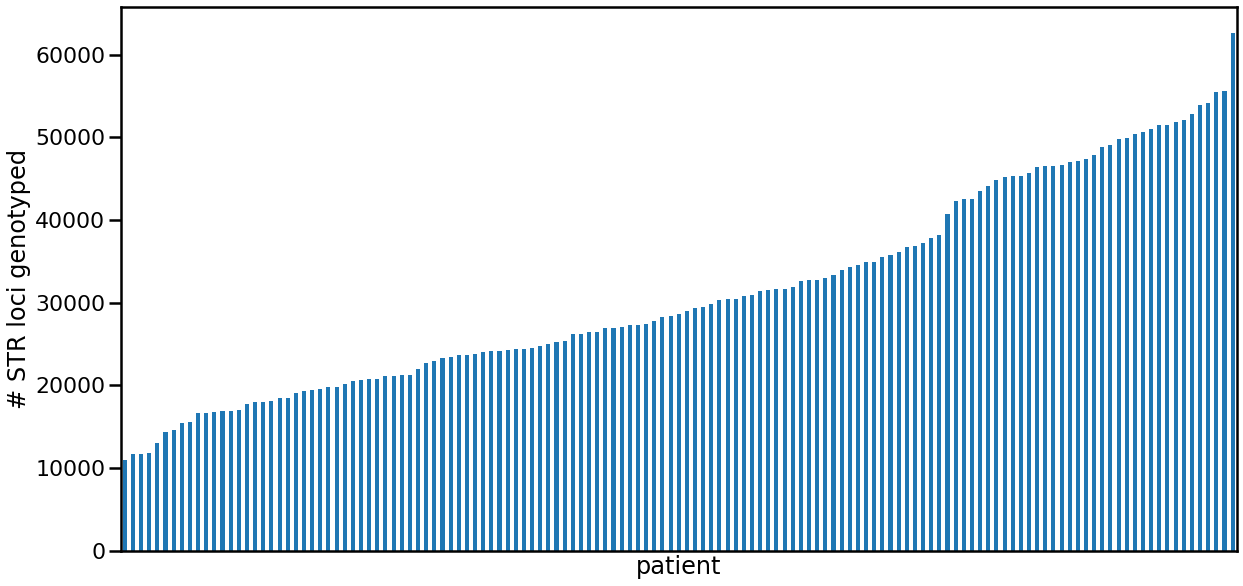

In [12]:
fig = plt.figure(figsize=(20, 10))

ax = (
    df_patient_variation_filt
        .groupby("patient")
        .size()
        .sort_values()
        .plot(kind="bar")
)

ax.set(xticks=[], ylabel="# STR loci genotyped")

plt.show()

In [11]:
df_patient_variation_filt = (
    df_patient_variation_filt
        .groupby('patient')
        .filter(lambda x: len(x) > 5000)
        .reset_index(drop=True)
)

print(df_patient_variation_filt['patient'].nunique())
df_patient_variation_filt.describe()

137


,repeat_id,start,end,period,ref,allele_a_healthy,allele_b_healthy,allele_a_tumor,allele_b_tumor,patient_len_diff
count,4.007895e+06,4.281871e+06,4.281871e+06,4.281871e+06,4.281871e+06,4.281871e+06,4.281871e+06,4.281871e+06,4.281871e+06,4.281871e+06
mean,7.665270e+05,8.023658e+07,8.023659e+07,2.192871e+00,6.686502e+00,6.605447e+00,6.633641e+00,6.571741e+00,6.607956e+00,1.912059e-01
std,4.472002e+05,5.677642e+07,5.677642e+07,1.108283e+00,4.568258e+00,4.386314e+00,4.468222e+00,4.334652e+00,4.429091e+00,9.457584e-01
min,5.000000e+00,2.080000e+02,2.190000e+02,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.813340e+05,3.570591e+07,3.570592e+07,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00
50%,7.503710e+05,6.790948e+07,6.790948e+07,2.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00
75%,1.167266e+06,1.171939e+08,1.171939e+08,2.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,0.000000e+00
max,1.548898e+06,2.489196e+08,2.489196e+08,6.000000e+00,5.000000e+01,5.100000e+01,3.850000e+02,5.000000e+01,7.700000e+01,3.600000e+02


In [29]:
df_patient_variation_filt = df_patient_variation_filt.merge(df_str_info[["tmp_id", "region_type"]], on="tmp_id", how="left")



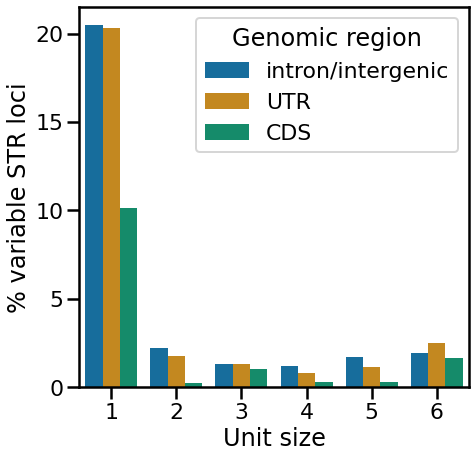

In [30]:
fig = plt.figure(figsize=(7, 7))

df_barplot = (
    df_patient_variation_filt
#         .query("patient_len_diff > 0")
        .groupby(["region_type", "period"])
        .size()
        .reset_index()
)
df_barplot.columns = ["region_type", "period", "total_count"]

df_barplot = df_barplot.merge(
    df_patient_variation_filt[df_patient_variation_filt["patient_len_diff"] > 0].groupby(["region_type", "period"]).size().reset_index(),
    on=["region_type", "period"], how="left"
)
df_barplot.columns = ["region_type", "period", "total_count", "variable_count"]

df_barplot["perc_loci_var"] = df_barplot["variable_count"] / df_barplot["total_count"] * 100
# df['m'] = pd.Categorical(df['m'], ["March", "April", "Dec"])
df_barplot["region_type"] = pd.Categorical(df_barplot["region_type"], ["intron/intergenic", "UTR", "CDS"])

# df_barplot = df_barplot.merge(df_clinical, on="patient", how="left")

ax = sns.barplot(
    data = df_barplot.sort_values(by="perc_loci_var"),
    x="period",
    y="perc_loci_var",
    hue="region_type",
    palette="colorblind"
)
ax.set(xlabel="Unit size", ylabel="% variable STR loci")
ax.legend(loc='best', title="Genomic region")

plt.show()

<AxesSubplot:xlabel='patient', ylabel='perc_loci_var'>

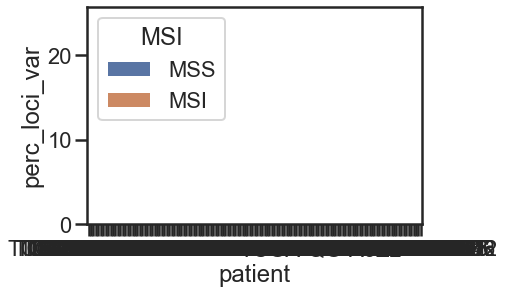

In [72]:
df_barplot = df_barplot.sort_values(by="perc_loci_var")
df_barplot

sns.barplot(
    data = df_barplot,
    x="patient",
    y="perc_loci_var",
    hue="MSI"
)

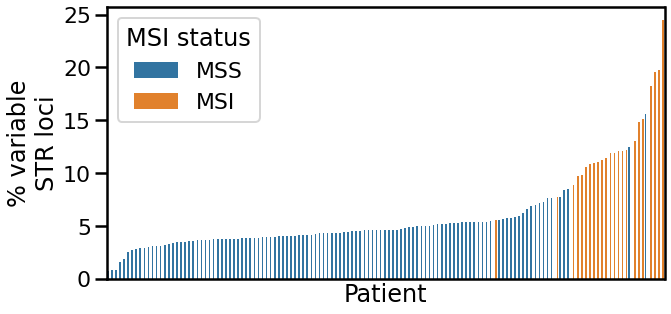

In [13]:
fig = plt.figure(figsize=(10, 5))

df_barplot = (
    df_patient_variation_filt
#         .query("patient_len_diff > 0")
        .groupby("patient")
        .size()
        .reset_index()
)
df_barplot.columns = ["patient", "total_count"]
df_barplot.head()

df_barplot = df_barplot.merge(
    df_patient_variation_filt[df_patient_variation_filt["patient_len_diff"] > 0].groupby("patient").size().reset_index(),
    on="patient", how="left"
)
df_barplot.columns = ["patient", "total_count", "variable_count"]
df_barplot["perc_loci_var"] = df_barplot["variable_count"] / df_barplot["total_count"] * 100
df_barplot = df_barplot.merge(df_clinical, on="patient", how="left")

ax = sns.barplot(
    data = df_barplot.sort_values(by="perc_loci_var"),
    x=df_barplot.sort_values(by="perc_loci_var")["patient"],
    y=df_barplot.sort_values(by="perc_loci_var")["perc_loci_var"],
    hue="MSI"
)
ax.set(xticks=[], xlabel="Patient", ylabel="% variable\nSTR loci")
ax.legend(loc='upper left', title="MSI status")

plt.show()

In [14]:
print(df_patient_variation_filt[["tmp_id", "period"]].drop_duplicates().shape[0])
df_patient_variation_filt[["tmp_id", "period"]].drop_duplicates().groupby("period").size()

87446


period
1    26304
2    38948
3     7318
4    10818
5     2937
6     1121
dtype: int64

In [10]:
df_mss = df_patient_variation_filt[df_patient_variation_filt.merge(df_clinical, on="patient")["MSI"] == "MSS"]
df_msi = df_patient_variation_filt[df_patient_variation_filt.merge(df_clinical, on="patient")["MSI"] == "MSI"]

print(df_mss.shape, df_msi.shape)

(3640896, 13) (640975, 13)


In [11]:
msi_set = set(df_msi[df_msi['period'] == 1].groupby('tmp_id').size()[lambda x: x > 5].index)
mss_set = set(df_mss[df_mss['period'] == 1].groupby('tmp_id').size()[lambda x: x > 5].index)

full_set = msi_set & mss_set

print(len(msi_set), len(mss_set))
print(len(msi_set & mss_set))

9467 20939
9467


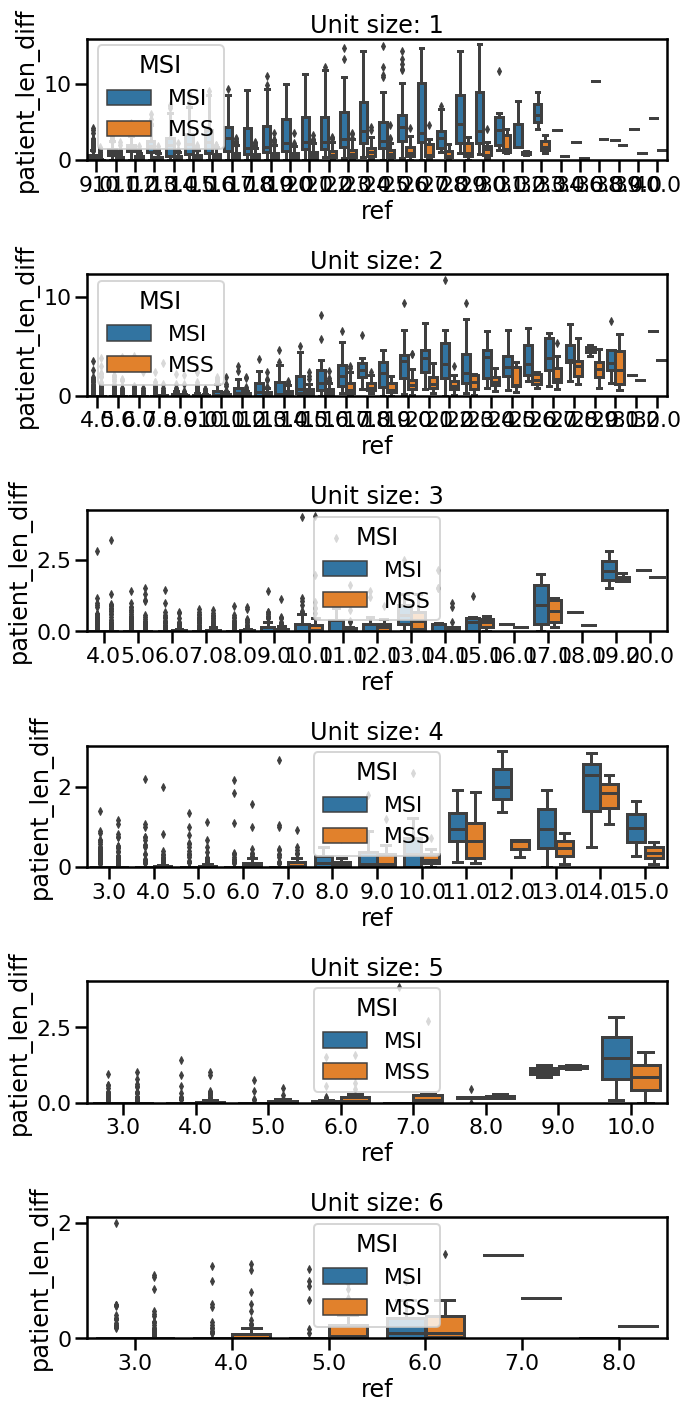

In [12]:
fig, axes = plt.subplots(6, 1, figsize=(10, 20))

for period in range(1, 7):
    ax = axes[period - 1]

    msi_set = set(df_msi[df_msi['period'] == period].groupby('tmp_id').size()[lambda x: x > 5].index)
    mss_set = set(df_mss[df_mss['period'] == period].groupby('tmp_id').size()[lambda x: x > 5].index)

    mask = df_patient_variation_filt["tmp_id"].isin(msi_set & mss_set)
    df_plot = (
            df_patient_variation_filt[mask]            
              .merge(df_clinical, how="left", on="patient")
              .groupby(['MSI', 'tmp_id'])
              .mean()
              .reset_index()
        )
    sns.boxplot(
        data=df_plot,
        x="ref",
        y="patient_len_diff",
        hue="MSI",
#         width=1.0,
        ax=ax
    )

    ax.set(ylim=(0, None), title=f"Unit size: {period}")

fig.tight_layout()
plt.show()


# Locus level variation statistics

In [13]:
df_str_info = pd.read_csv(
    "/Users/maxverbiest/PhD/data/str_panels/tral_and_perf_panel_meta_info.tsv",
    sep="\t"
)

df_patient_variation_filt = pd.read_csv(
    "/Users/maxverbiest/PhD/projects/genotype_strs/results/oxana_variation/patient_variation_wide_blood_filt.csv",
    sep=","
)

df_clinical = pd.read_csv(
    "/Users/maxverbiest/PhD/projects/genotype_strs/data/clinical/oxana_tcga_clinical.csv", 
).loc[:, ["case_submitter_id", "gender", "MSI", "CMS"]]
df_clinical.columns = ["patient", "gender", "MSI", "CMS"]

In [16]:
df_locus_var = pd.read_csv(
    "/Users/maxverbiest/PhD/projects/genotype_strs/results/oxana_variation/20220527_locus_variation_MSI_groups.csv"
)
df_locus_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155530 entries, 0 to 155529
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MSI             155530 non-null  object 
 1   tmp_id          155530 non-null  object 
 2   instable_calls  155530 non-null  int64  
 3   stable_calls    155530 non-null  int64  
 4   total_calls     155530 non-null  int64  
 5   frac_variable   155530 non-null  float64
 6   avg_size_diff   155530 non-null  float64
 7   repeat_id       144647 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 9.5+ MB


In [17]:
min_calls = 5
enough_in_mss = set(df_locus_var[(df_locus_var["MSI"] == "MSS") & (df_locus_var["total_calls"] >= min_calls)].tmp_id)
enough_in_msi = set(df_locus_var[(df_locus_var["MSI"] == "MSI") & (df_locus_var["total_calls"] >= min_calls)].tmp_id)
pass_filter = enough_in_msi & enough_in_mss

print(len(enough_in_mss), len(enough_in_msi))
print(len(pass_filter))

70048 40629
40617


In [18]:
df_locus_var_filt = df_locus_var[df_locus_var["tmp_id"].isin(pass_filter)]
df_locus_var_filt

,MSI,tmp_id,instable_calls,stable_calls,total_calls,frac_variable,avg_size_diff,repeat_id
0,MSI,chr1_100006978,0,9,9,0.000000,0.000000,1166176.0
1,MSI,chr1_100038244,0,13,13,0.000000,0.000000,1166257.0
3,MSI,chr1_100077147,19,2,21,0.904762,3.333333,1166291.0
4,MSI,chr1_10008054,5,0,5,1.000000,4.400000,1106249.0
5,MSI,chr1_100085695,0,6,6,0.000000,0.000000,1166397.0
...,...,...,...,...,...,...,...,...
155523,MSS,chrY_2975669,0,27,27,0.000000,0.000000,1236627.0
155525,MSS,chrY_2976735,0,25,25,0.000000,0.000000,1236685.0
155526,MSS,chrY_6868982,0,25,25,0.000000,0.000000,1237691.0
155527,MSS,chrY_7024972,0,19,19,0.000000,0.000000,1237731.0


In [19]:
df_locus_var_filt = df_locus_var_filt.merge(df_str_info.drop("repeat_id", axis=1), on="tmp_id", how="left")


In [20]:
df_locus_var_filt["MSI"] = pd.Categorical(df_locus_var_filt["MSI"], ["MSS", "MSI"])
df_locus_var_filt["perc_variable"] = df_locus_var_filt["frac_variable"] * 100

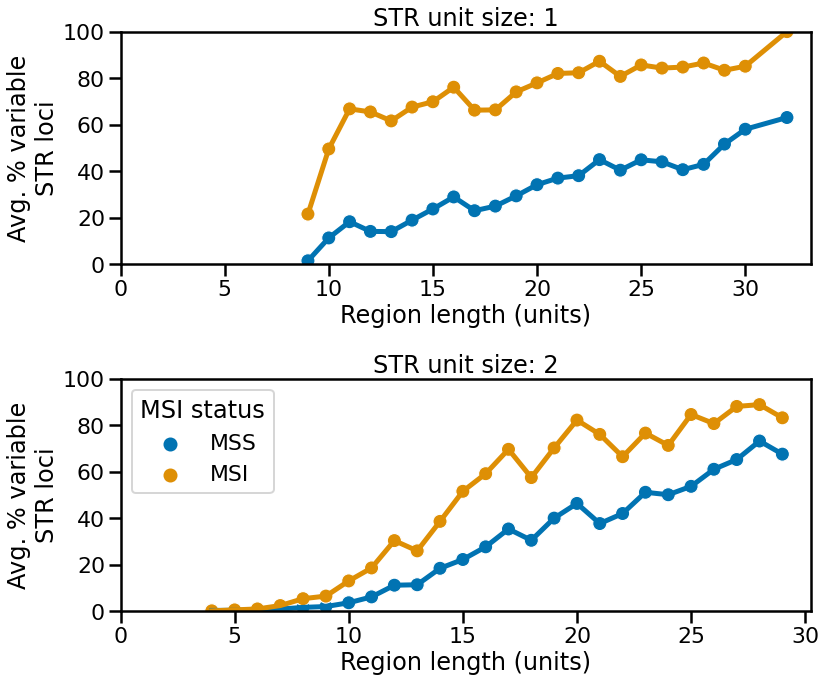

In [24]:
# plt.rcParams.update({'text.color' : "white",
#                      'axes.labelcolor' : "white"})
# plt.rcParams.update('font', size=55)

# sns.set(font_scale = 4)
# sns.set_style("ticks")
# sns.set_context("poster")

nrow, ncol = 2, 1
fig, axes = plt.subplots(nrow, ncol, figsize=(12, 10), sharex=False, sharey=True)

min_loci = 5
for period in range(1, 3):
    ax = axes[period - 1]
    
    cur_data = df_locus_var_filt[df_locus_var_filt["period"] == period].groupby(["MSI", "ref"]).filter(lambda x: len(x) >= min_loci).reset_index()
    cur_data = cur_data.groupby(["MSI", "ref"]).mean()
        
    sns.scatterplot(
        data = cur_data,
        x="ref",
        y="perc_variable",
        hue="MSI",
        palette="colorblind",
        legend= False if period - 1 == 0 else True,
        ax = ax,
        s=200
    )
    if period - 1 == 1:
        ax.legend(title="MSI status")
    
    sns.lineplot(
        data = cur_data,
        x="ref",
        y="perc_variable",
        hue="MSI",
        palette="colorblind",
        legend=False,
        ax=ax,
        linewidth=5
    )

    ax.set(
        ylim=(0, 100), 
        xlim=(0, None),
        title=f"STR unit size: {period}", 
        xlabel="Region length (units)",
        ylabel="Avg. % variable\nSTR loci"
    )
    ax.xaxis.get_major_locator().set_params(integer=True)

# sns.lineplot()
fig.tight_layout()


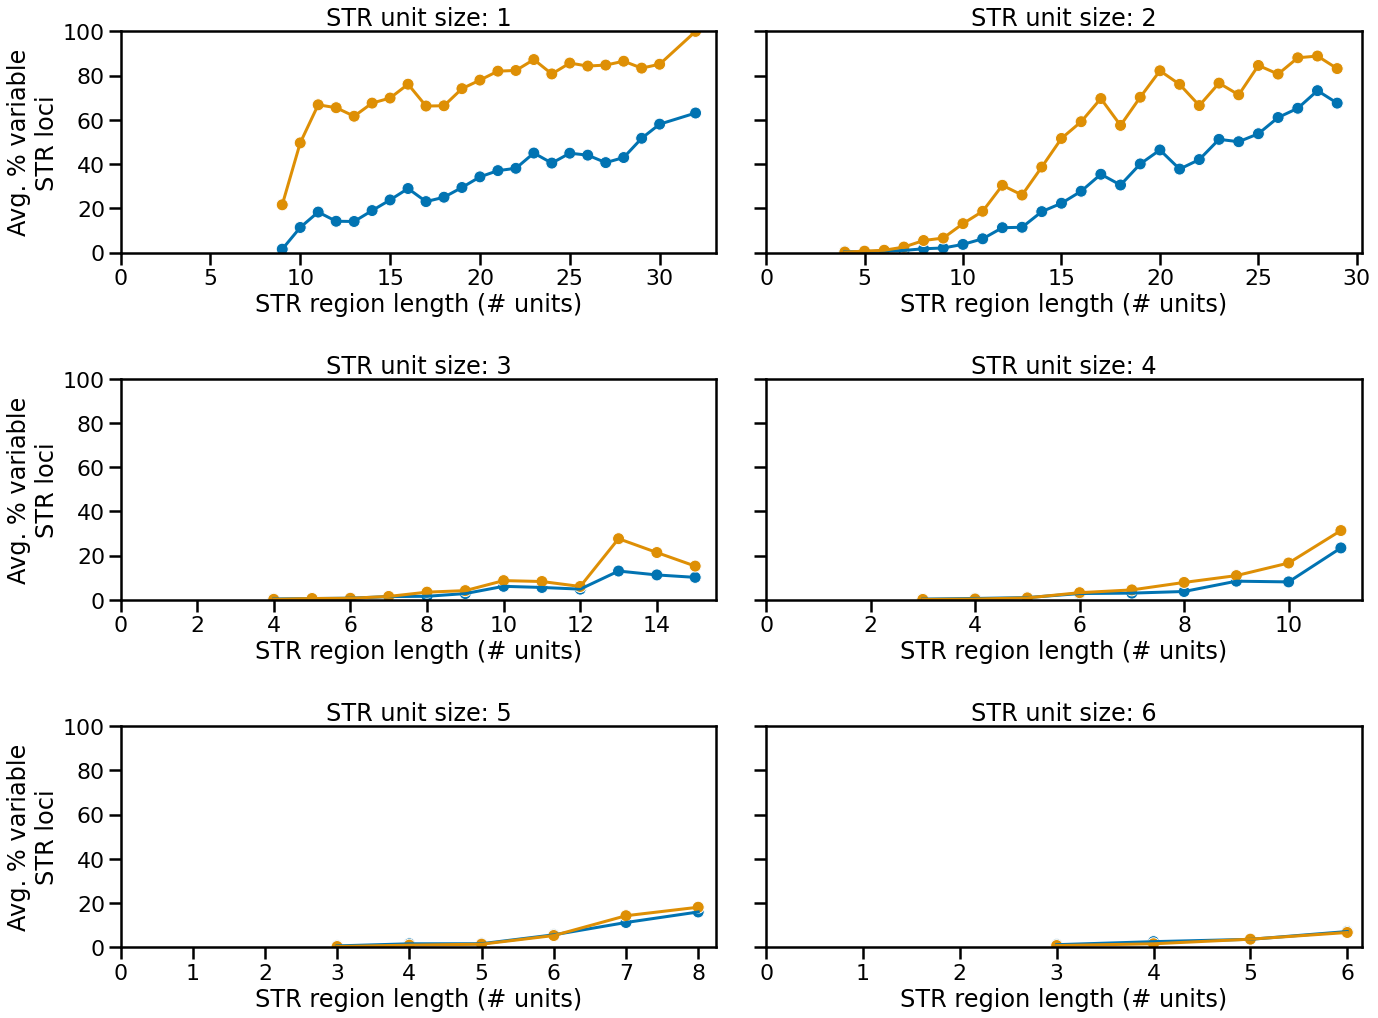

In [27]:
plt.rc('font', size=35)

nrow, ncol = 3, 2
fig, axes = plt.subplots(nrow, ncol, figsize=(20, 15), sharex=False, sharey=True)

min_loci = 5
cur_row, cur_col = 0, 0
for period in range(1, 7):
    if cur_col == ncol:
        cur_col -= ncol
        cur_row += 1 
    ax = axes[cur_row][cur_col]
    cur_col += 1
    
    cur_data = df_locus_var_filt[df_locus_var_filt["period"] == period].groupby(["MSI", "ref"]).filter(lambda x: len(x) >= min_loci).reset_index()
    cur_data = cur_data.groupby(["MSI", "ref"]).mean()
        
    sns.scatterplot(
        data = cur_data,
        x="ref",
        y="perc_variable",
        hue="MSI",
        palette="colorblind",
        legend=False,
        ax = ax
    )
    
    sns.lineplot(
        data = cur_data,
        x="ref",
        y="perc_variable",
        hue="MSI",
        palette="colorblind",
        legend=False,
        ax=ax
    )

    ax.set(
        xlim=(0, None),
        ylim=(0, 100), 
        title=f"STR unit size: {period}", 
        xlabel="STR region length (# units)",
        ylabel="Avg. % variable\nSTR loci"
    )
    ax.xaxis.get_major_locator().set_params(integer=True)
    
fig.tight_layout()


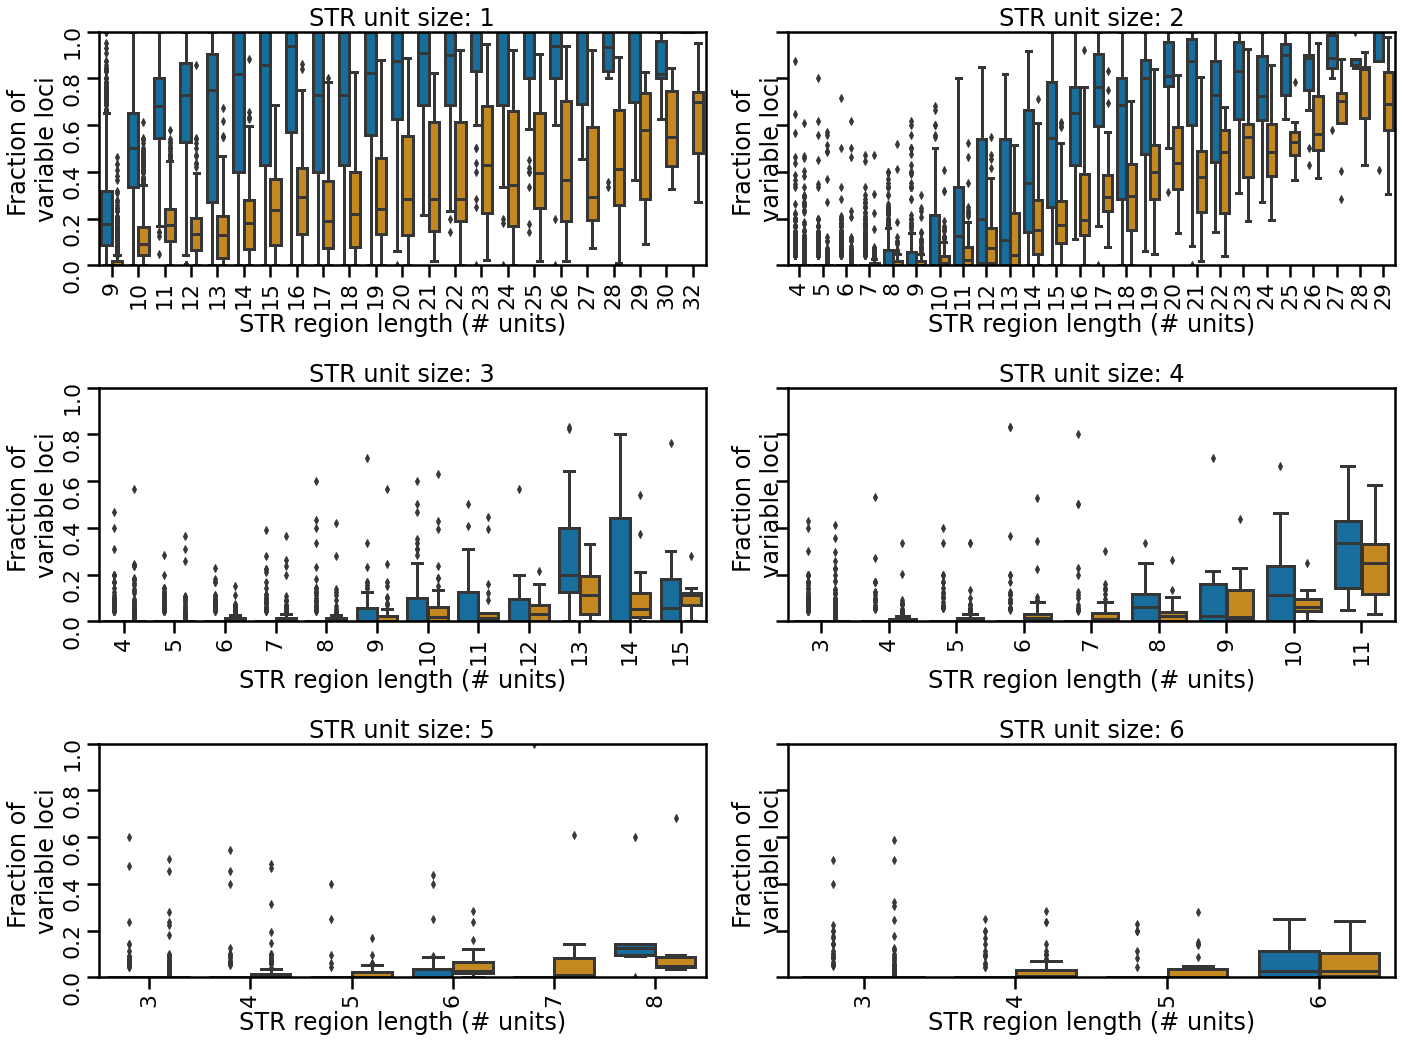

In [21]:
nrow, ncol = 3, 2
fig, axes = plt.subplots(nrow, ncol, figsize=(20, 15), sharex=False, sharey=True)

min_loci = 5
cur_row, cur_col = 0, 0
for period in range(1, 7):
    if cur_col == ncol:
        cur_col -= ncol
        cur_row += 1 
    ax = axes[cur_row][cur_col]
    cur_col += 1
    
    cur_data = df_locus_var_filt[df_locus_var_filt["period"] == period].groupby(["MSI", "ref"]).filter(lambda x: len(x) >= min_loci).reset_index()
    
    sns.boxplot(
        data = cur_data,
        x = "ref",
        y="frac_variable",
        hue="MSI",
        palette="colorblind",
        ax = ax
    )
    
#     ax.xaxis.set_ticks(np.arange(cur_data["ref"].min(), cur_data["ref"].max()))
    ax.set(
#         xlim=(cur_data["ref"].min(), cur_data["ref"].max()),
        ylim=(0, 1), 
        title=f"STR unit size: {period}", 
        xlabel="STR region length (# units)",
        ylabel="Fraction of \nvariable loci"
    )
    ax.tick_params(labelrotation=90)
    ax.legend_.remove()


    
fig.tight_layout()


In [22]:
df_locus_var_filt[df_locus_var_filt["period"] == 3].groupby(["MSI", "ref"]).size()

MSI  ref
MSI  4      2341
     5       712
     6       353
     7       207
     8       125
     9        70
     10       57
     11       26
     12       24
     13       21
     14       16
     15        9
     16        1
     17        4
     18        1
     19        4
     20        1
MSS  4      2341
     5       712
     6       353
     7       207
     8       125
     9        70
     10       57
     11       26
     12       24
     13       21
     14       16
     15        9
     16        1
     17        4
     18        1
     19        4
     20        1
dtype: int64